# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands
    
- Business Goals:
    - To build a model to identify variables which are significant to the demand for shared bikes with the available independent variables.
    - Model will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
    - The model will be a good way for management to understand the demand dynamics of a new market.

# The steps we will follow in this exercise to build a multiple linear regression model are as follows:

   #### 1. Reading, Understanding, Cleaning and visualising the dataset
   #### 2. preparing the data for modelling (train-test split,rescaling etc.)
   #### 3. Training the Model
   #### 4. Residual Analysis
   #### 5. Prediction and evaluation the test data

# Step 1: Reading and Understanding the data


In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Statsmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data
bikesharing = pd.read_csv('data/day.csv')
bikesharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
#Shape of the dataframe
bikesharing.shape

(730, 16)

In [6]:
# Checking Data Types and non-null count 
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking data from Numerical columns 
bikesharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

##### Inference: There are 730 rows and 16 columns in the dataframe, there are no null values present in any of the columns

##### Derive variable

In [8]:
from datetime import datetime, timedelta
def week_of_month(date):
    month = date.month
    week = 0
    while date.month == month:
        week += 1
        date -= timedelta(days=7)

    return week

In [9]:
# bikesharing['week_of_month'] = bikesharing['dteday'].apply(lambda x: week_of_month(datetime.datetime.strptime(x, '%d-%m-%Y').date()))
bikesharing['week_of_month'] = bikesharing['dteday'].apply(lambda x: week_of_month(datetime.strptime(x, '%d-%m-%Y').date()))

bikesharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  week_of_month  
0   985              1  
1   801              1  
2  1349              1  
3  1562              1  
4  1600              1

##### Cleaning the dataset

- Dropping columns which contains unnecessary information
    - instant is just an index column
    - dteday can be removed as same can be calculated using mnth, year and weekday column

In [10]:
# Droping instant column as it is index column which has nothing to do with target
bikesharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have year, month and weekday columns to work with
bikesharing.drop(['dteday'], axis = 1, inplace = True)


# Dropping registered and casual as their sum defines the target variable 
# cnt = registered + casual
bikesharing.drop(['casual','registered'], axis = 1, inplace = True)

In [11]:
# Verify missing values
bikesharing.isnull().sum()

season           0
yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
week_of_month    0
dtype: int64

###### There are no missing values

In [12]:
bikesharing.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  week_of_month  
0  18.18125  80.5833  10.749882   985              1  
1  17.68695  69.6087  16.652113   801              1  
2   9.47025  43.7273  16.636703  1349              1  
3  10.60610  59.0435  10.739832  1562              1  
4  11.46350  43.6957  12.522300  1600              1

In [13]:
# Checking correlation in bike sharing dataframe
bikesharing.corr()

season            yr          mnth   holiday   weekday  \
season         1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr            -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth           8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday       -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday       -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday     1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit     2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp           3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp          3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum            2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed     -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt            4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   
week_of_month  3.601670e-03  2.310079e-15  1.370098e-02 -0.004338 -0.002480   

               workingday  weathersit      temp     atemp       hum  \
season           0.013762    0.021306  0.333361  0.342014  0.208220   
yr              -0.002945   -0.050322  0.048789  0.047215 -0.112547   
mnth            -0.004688    0.045613  0.219083  0.226430  0.224937   
holiday         -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   
weekday          0.035800    0.031112 -0.000168 -0.007539 -0.052290   
workingday       1.000000    0.060236  0.053470  0.052940  0.023202   
weathersit       0.060236    1.000000 -0.119503 -0.120559  0.590277   
temp             0.053470   -0.119503  1.000000  0.991696  0.128565   
atemp            0.052940   -0.120559  0.991696  1.000000  0.141512   
hum              0.023202    0.590277  0.128565  0.141512  1.000000   
windspeed       -0.018666    0.039769 -0.158186 -0.183876 -0.248506   
cnt              0.062542   -0.295929  0.627044  0.630685 -0.098543   
week_of_month   -0.006078   -0.024220  0.024770  0.017985  0.038866   

               windspeed       cnt  week_of_month  
season         -0.229607  0.404584   3.601670e-03  
yr             -0.011624  0.569728   2.310079e-15  
mnth           -0.208013  0.278191   1.370098e-02  
holiday         0.006257 -0.068764  -4.338340e-03  
weekday         0.014283  0.067534  -2.480324e-03  
workingday     -0.018666  0.062542  -6.077674e-03  
weathersit      0.039769 -0.295929  -2.421976e-02  
temp           -0.158186  0.627044   2.477011e-02  
atemp          -0.183876  0.630685   1.798469e-02  
hum            -0.248506 -0.098543   3.886637e-02  
windspeed       1.000000 -0.235132   8.544563e-03  
cnt            -0.235132  1.000000  -2.458633e-02  
week_of_month   0.008545 -0.024586   1.000000e+00

##### Inference : we can see that season, weathersit, mnth and weekday are categorical column but they are present as numeric columns, so they have to converted in categorical columns and later they can be used to create dummy vairables

In [14]:
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing.mnth = bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing.week_of_month = bikesharing.week_of_month.replace({1: 'first',2: 'second',3: 'third',4: 'fourth',5: 'fifth'})

bikesharing.weekday = bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikesharing.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt week_of_month  
0  18.18125  80.5833  10.749882   985         first  
1  17.68695  69.6087  16.652113   801         first  
2   9.47025  43.7273  16.636703  1349         first  
3  10.60610  59.0435  10.739832  1562         first  
4  11.46350  43.6957  12.522300  1600         first

#### Visualise the data

<Figure size 1080x2160 with 0 Axes>

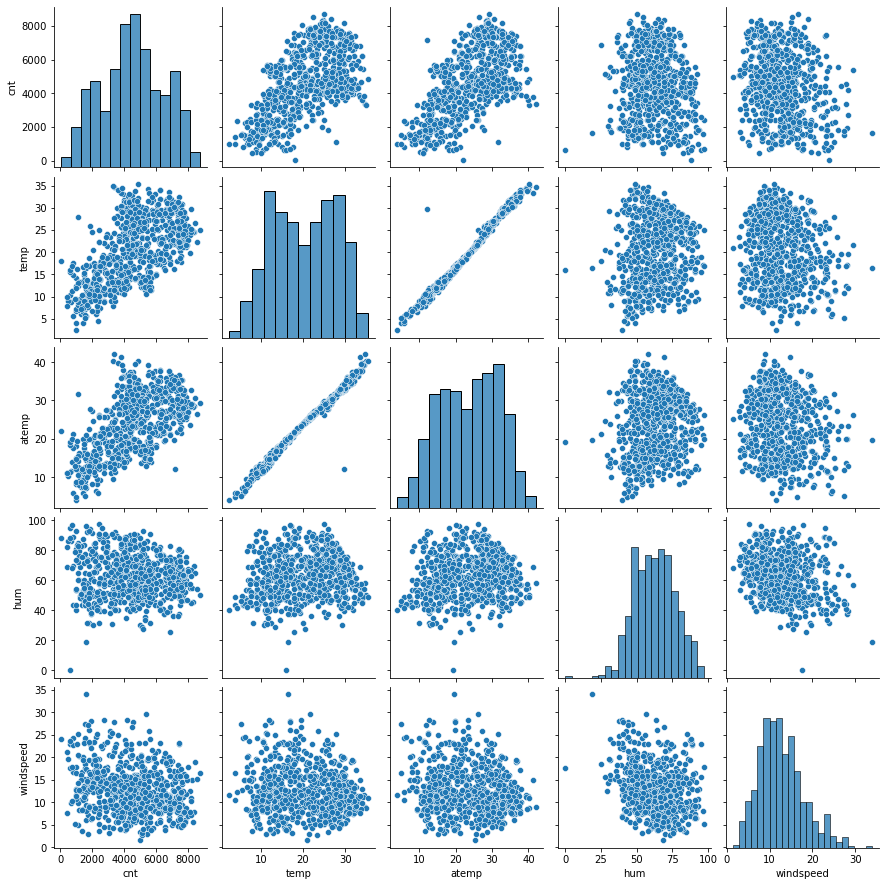

In [15]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- temp and atemp shows the linear relationship with the target variable cnt
- temp and atemp are highly co-related with each other

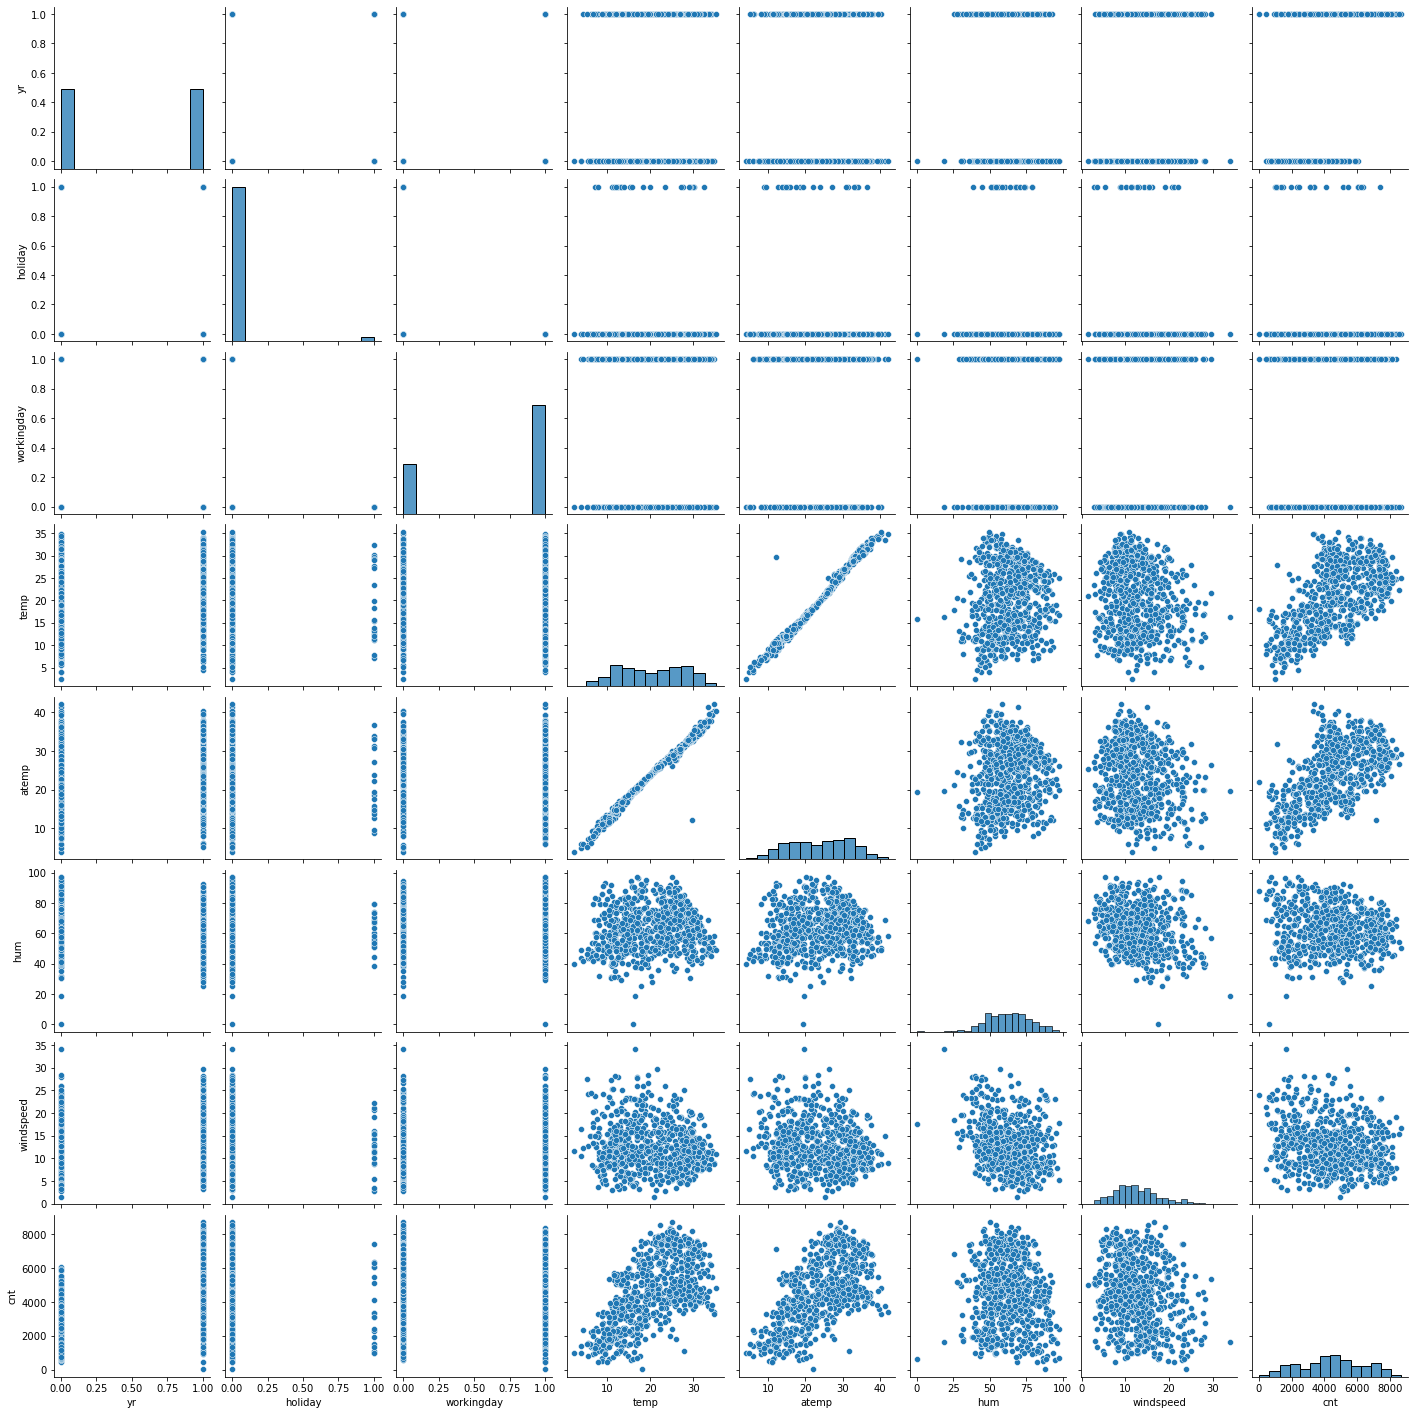

In [16]:
# Visualise the numeric variables
sns.pairplot(bikesharing)
plt.show()

### Inferences:
- temp, atemp, casual and registred has the highest corelation with the target variable cnt
- Registered follows as strong trend with count as compared to casual
- temp and atemp are seems highly correlated with each other

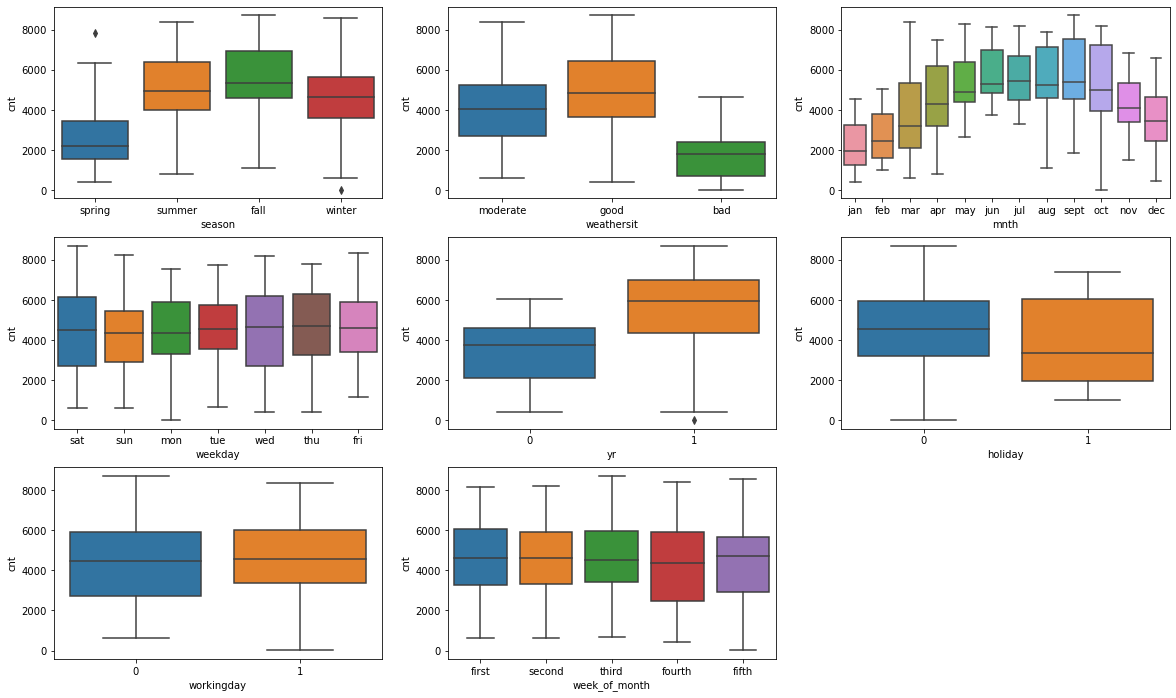

In [17]:
# Visualise the categorical variables
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikesharing)

plt.subplot(3,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bikesharing)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikesharing)

plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt', data=bikesharing)

plt.subplot(3,3,5)
sns.boxplot(x='yr', y='cnt', data=bikesharing)

plt.subplot(3,3,6)
sns.boxplot(x='holiday', y='cnt', data=bikesharing)

plt.subplot(3,3,7)
sns.boxplot(x='workingday', y='cnt', data=bikesharing)

plt.subplot(3,3,8)
sns.boxplot(x='week_of_month', y='cnt', data=bikesharing)

plt.show()

### Inferences:
- There is a drop in Spring season compared to other seasons
- In bad or  severe weather counts are low
- Months also explains the behaviour of seasons as there is a steep from April onwards
- There is no influence of weekday on counts
- There are no outliers to be handled.

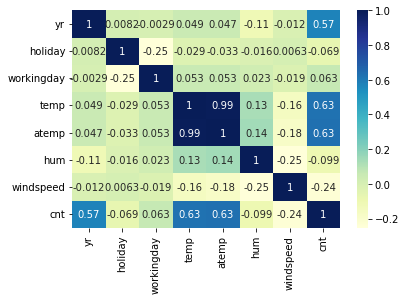

In [18]:
# Visualisation with heat Map
sns.heatmap(bikesharing.corr(),annot= True,cmap="YlGnBu")
plt.show()

#### temp and atemp has correlation more than .99 means almost 1 and hence column temp can be dropped instead of atemp as:
- atemp is the temprature which is relative a person is feeling
- temp is the temprature which is measured by satellite

In [19]:
bikesharing.drop(['temp'], axis = 1, inplace = True)

# Step 2: Prepare the Data for Modelling

- Encoding:
    - coverting binary variable to 1/0
    - Other categorical variables to dummy variables
- Splitting into train and test
- Rescaling of variables

In [20]:
bikesharing.head()

season  yr mnth  holiday weekday  workingday weathersit     atemp      hum  \
0  spring   0  jan        0     sat           0   moderate  18.18125  80.5833   
1  spring   0  jan        0     sun           0   moderate  17.68695  69.6087   
2  spring   0  jan        0     mon           1       good   9.47025  43.7273   
3  spring   0  jan        0     tue           1       good  10.60610  59.0435   
4  spring   0  jan        0     wed           1       good  11.46350  43.6957   

   windspeed   cnt week_of_month  
0  10.749882   985         first  
1  16.652113   801         first  
2  16.636703  1349         first  
3  10.739832  1562         first  
4  12.522300  1600         first

In [21]:
print(bikesharing.season.value_counts())
print(bikesharing.mnth.value_counts())
print(bikesharing.weekday.value_counts())
print(bikesharing.weathersit.value_counts())
print(bikesharing.holiday.value_counts())
print(bikesharing.workingday.value_counts())
print(bikesharing.week_of_month.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64
good        463
moderate    246
bad          21
Name: weathersit, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
first     168
second    168
third     168
fourth    168
fifth      58
Name: week_of_month, dtype: int64


##### Create dummy variables for all categorical variables

In [22]:
bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday","week_of_month"],drop_first=True)
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"]) # first column was not dropped as we don't want to lose the info about any weather condition.

In [23]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'week_of_month_first', 'week_of_month_fourth',
       'week_of_month_second', 'week_of_month_third', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [24]:
bikesharing.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  season_spring  \
0   0        0           0  18.18125  80.5833  10.749882   985              1   
1   0        0           0  17.68695  69.6087  16.652113   801              1   
2   0        0           1   9.47025  43.7273  16.636703  1349              1   
3   0        0           1  10.60610  59.0435  10.739832  1562              1   
4   0        0           1  11.46350  43.6957  12.522300  1600              1   

   season_summer  season_winter  ...  weekday_thu  weekday_tue  weekday_wed  \
0              0              0  ...            0            0            0   
1              0              0  ...            0            0            0   
2              0              0  ...            0            0            0   
3              0              0  ...            0            1            0   
4              0              0  ...            0            0            1   

   week_of_month_first  week_of_month_fourth  week_of_month_second  \
0                    1                     0                     0   
1                    1                     0                     0   
2                    1                     0                     0   
3                    1                     0                     0   
4                    1                     0                     0   

   week_of_month_third  weathersit_bad  weathersit_good  weathersit_moderate  
0                    0               0                0                    1  
1                    0               0                0                    1  
2                    0               0                1                    0  
3                    0               0                1                    0  
4                    0               0                1                    0  

[5 rows x 34 columns]

#### Split Data into training and test
- we are splitting the set into 75-25 ratio
- we are assigning a random state of 50 for recalculation

In [25]:
# Split size 75-25. random state = 50
df_train, df_test = train_test_split(bikesharing, train_size=0.75, random_state=50)
print(df_train.shape)
print(df_test.shape)

(547, 34)
(183, 34)


#### Feature Scaling:
- To make all features in same scale to interpret easily
- Min-Max scaling (normalisation) : Between 0 and 1

In [26]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['atemp','hum','windspeed']

# 2. Fit on Data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday     atemp       hum  windspeed   cnt  \
98    0        0           0  0.361592  0.904250   0.189757  2455   
396   1        0           1  0.533818  0.523401   0.310919  4579   
175   0        0           0  0.777362  0.498067   0.355294  5202   
454   1        0           0  0.472056  0.760841   0.444127  6235   
234   0        0           1  0.726048  0.469300   0.219363  5895   

     season_spring  season_summer  season_winter  ...  weekday_thu  \
98               0              1              0  ...            0   
396              1              0              0  ...            0   
175              0              0              0  ...            0   
454              0              1              0  ...            0   
234              0              0              0  ...            0   

     weekday_tue  weekday_wed  week_of_month_first  week_of_month_fourth  \
98             0            0                    0                     0   
396            0            1                    1                     0   
175            0            0                    0                     1   
454            0            0                    0                     0   
234            1            0                    0                     1   

     week_of_month_second  week_of_month_third  weathersit_bad  \
98                      1                    0               0   
396                     0                    0               0   
175                     0                    0               0   
454                     0                    0               0   
234                     0                    0               0   

     weathersit_good  weathersit_moderate  
98                 0                    1  
396                1                    0  
175                1                    0  
454                0                    1  
234                1                    0  

[5 rows x 34 columns]

In [27]:
df_train[num_vars].describe()

atemp         hum   windspeed
count  547.000000  547.000000  547.000000
mean     0.540143    0.643969    0.317546
std      0.222163    0.147268    0.167984
min      0.000000    0.000000    0.000000
25%      0.340723    0.528982    0.197183
50%      0.550315    0.645771    0.294759
75%      0.730399    0.750751    0.406464
max      1.000000    1.000000    1.000000

In [28]:
y_train = df_train.pop('cnt') # popping out the target variable and assigning it to y_train
X_train = df_train            # leaving all the renaming columns as independent variables

# Step 3: Training The Model

#### Build a Model using RFE and Automated approach

In [29]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

#Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 17),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 4),
 ('mnth_jun', False, 18),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', False, 19),
 ('weekday_mon', False, 16),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 14),
 ('week_of_month_first', False, 8),
 ('week_of_month_fourth', False, 11),
 ('week_of_month_second', False, 7),
 ('week_of_month_third', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [30]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['windspeed', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'week_of_month_first', 'week_of_month_fourth', 'week_of_month_second',
       'week_of_month_third'],
      dtype='object')

In [31]:
# Features selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'mnth_oct', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [32]:
# Selecting all the features selected by rfe and minimizing train set
X_train_rfe = X_train[cols]

In [33]:
X_train_rfe.shape

(547, 15)

##### Build model using statmodel


In [34]:
# creating functions to build model and evaluating VIF as this is a countinous activity in case of multiple linear regression model
def build_linear_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

# Model 1 with all variables selected by RFE

In [35]:
# Select all features selected by RFE
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'mnth_oct', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     195.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.95e-193
Time:                        17:14:11   Log-Likelihood:                -4438.5
No. Observations:                 547   AIC:                             8905.
Df Residuals:                     533   BIC:                             8965.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 923.0122    

- Checking correlation of features selected by RFE with target column. 
- Also to check impact of different features on target

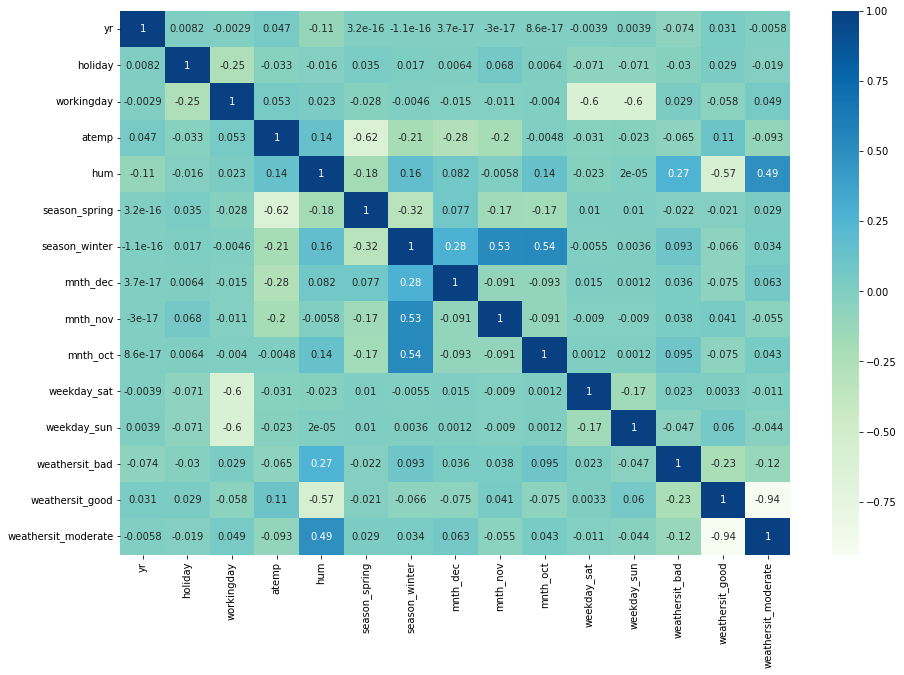

In [36]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikesharing[cols].corr(), cmap='GnBu', annot=True)
plt.show()

##### Inferences:
- Some of the VIF's are coming as infinite, lets remove some features and try to re-calculate VIF accordingly

##### we are following below elimination staretegy
- we could have:
    - High P-value, high VIF
    - High-Low
        - High P, Low VIF -> remove these first
        - Low P, High VIF -> remove these after the above one
    - Low P-Low VIF

# Model 2
- Dropping the variable weekday_sun as it has high p-value

In [37]:
# Dropping the variable weekday_sun as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'mnth_oct', 'weekday_sat',
       'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     195.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.95e-193
Time:                        17:14:27   Log-Likelihood:                -4438.5
No. Observations:                 547   AIC:                             8905.
Df Residuals:                     533   BIC:                             8965.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1013.6883    

# Model 3
- Dropping the variable mnth_oct as it has high P-Value

In [38]:
# Dropping the variable mnth_oct as it has high P-Value
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.05e-193
Time:                        17:14:38   Log-Likelihood:                -4439.5
No. Observations:                 547   AIC:                             8905.
Df Residuals:                     534   BIC:                             8961.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1015.0075    

# Model 4
- Dropping the variable holiday as it has high P-Value

In [39]:
# Dropping the variable holiday as it has high P-Value
cols = ['yr', 'workingday', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     229.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.07e-194
Time:                        17:14:46   Log-Likelihood:                -4440.7
No. Observations:                 547   AIC:                             8905.
Df Residuals:                     535   BIC:                             8957.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 985.7393    

##### Inferences : 
- VIF now looking better than the previous Model
- All the columns have p-value < .05 so checking VIFs

# Model 5
- Dropping the variable weathersit_good as it has high VIF

In [40]:
# Dropping the variable weathersit_good as it has high VIF
cols = ['yr', 'workingday', 'atemp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     229.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.07e-194
Time:                        17:14:58   Log-Likelihood:                -4440.7
No. Observations:                 547   AIC:                             8905.
Df Residuals:                     535   BIC:                             8957.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2186.8252    

# Model 6
- Dropping the variable hum as it has high VIF and high correlation with atemp

In [41]:
# Dropping the variable hum as it has high VIF and high correlation with atemp
cols = ['yr', 'workingday', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.16e-193
Time:                        17:15:10   Log-Likelihood:                -4446.6
No. Observations:                 547   AIC:                             8915.
Df Residuals:                     536   BIC:                             8963.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1702.7588    

# Model 7
- Dropping the variable workingday as it has high VIF and also the mean for both of its values is almost equal, so it doesn't much add any value to the analysis

In [42]:
# Dropping the variable workingday as it has high VIF and also the mean for both of its values is almost equal, so it doesn't
# much add any value to the analysis
cols = ['yr', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weathersit_bad',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     263.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.50e-190
Time:                        17:15:22   Log-Likelihood:                -4455.5
No. Observations:                 547   AIC:                             8931.
Df Residuals:                     537   BIC:                             8974.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2031.8141    

# Model 8
- P-Value got increased for weekday_sat
- Let's replace weekday_sat with Sunday and observe it's influence`

In [43]:
cols = ['yr', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sun',
       'weathersit_bad',
       'weathersit_moderate']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.97e-192
Time:                        17:15:30   Log-Likelihood:                -4451.1
No. Observations:                 547   AIC:                             8922.
Df Residuals:                     537   BIC:                             8965.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2138.3372    

# Model 9
- Adding column holiday again and checking whether it add something to the model or still increase the P-Value

In [44]:
# Adding column holiday again and checking whether it add something to the model or still increase the P-Value
cols = ['yr', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sun',
       'weathersit_bad',
       'weathersit_moderate', 'holiday']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     247.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.91e-193
Time:                        17:15:37   Log-Likelihood:                -4445.8
No. Observations:                 547   AIC:                             8914.
Df Residuals:                     536   BIC:                             8961.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2126.3069    

# Model 10
- Add feature which was dropped by rfe but conceptually plays important role
- Adding column windspeed which was dropped by rfe and checking whether it add something to the model

In [45]:
# Adding column windspeed again and checking whether it add something to the model or still increase the P-Value
cols = ['yr', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sun',
       'weathersit_bad',
       'weathersit_moderate', 'holiday', 'windspeed']

build_linear_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     234.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.31e-196
Time:                        17:16:02   Log-Likelihood:                -4435.5
No. Observations:                 547   AIC:                             8895.
Df Residuals:                     535   BIC:                             8947.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2564.3547    

##### Inferences:
- R-squared and Adjusted R-squared seems fair 
- R-squared is 0.828
- Adjusted R-squared is 0.825
- All the P-Values are almost 0
- VIF is around 4 for all the features which is acceptable

# Final Model

##### Build the final model using sklearn

In [46]:
# build the final model using sklearn
cols = ['yr', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sun',
       'weathersit_bad',
       'weathersit_moderate', 'holiday', 'windspeed']

#Build a model with above columns
lr = LinearRegression()
lr.fit(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2564.354657163031 [ 2033.54874772  3401.87057026 -1198.13998952   628.58470822
  -539.97966645  -695.79183544  -370.25029296 -2368.75680158
  -665.54207393  -723.81579161  -979.63580313]


# Step 4: Residual Analysis


In [47]:
y_train_pred = lr.predict(X_train[cols])  # predict values using the train set

Text(0.5, 0, 'Errors')

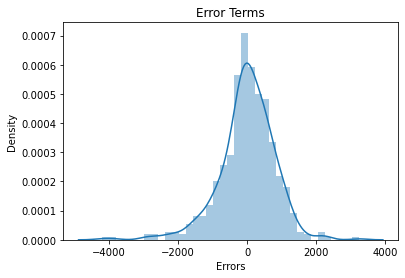

In [48]:
#Plot a histogram of the error terms

sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

##### Errors are normally distribured here with mean 0 and Model seems to be working fine with train data

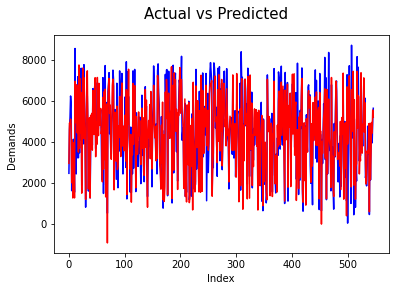

In [49]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

##### Actual and Predicted result following almost the same pattern so this model seems ok

Text(0, 0.5, 'y_train_pred')

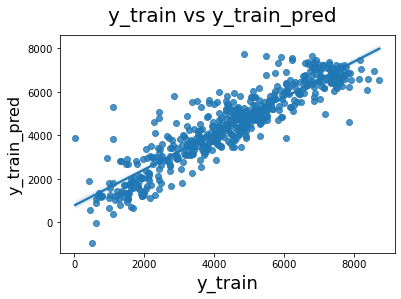

In [50]:
# Plotting y_train and y_pred to understand the spread.
fig = plt.figure()
# plt.scatter(y_train,y_train_pred)
sns.regplot(y=y_train_pred,x=y_train)
fig.suptitle('y_train vs y_train_pred', fontsize=20)        # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                     # Y-label

#### Linearity Check

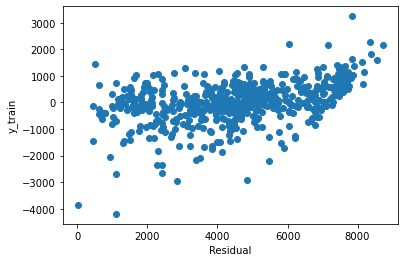

In [51]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Residual exibit a linear trend

In [52]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8283591240782849

##### R2 is same as we obtained for our final model i.e. 0.828

# Step 5: Prediction and Evaluation the Test Set

In [53]:
# Preprocessing
# 1. Preparing the test data as we have prepared for the trained data so that co-efficients are similar
num_vars = ['atemp','hum','windspeed']

# we don't want to learn anything by using fit as model has already learned in case of train data
# we can directly transform using previous learning
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday     atemp       hum  windspeed   cnt  \
333   0        0           1  0.319837  0.632030   0.488582  3613   
203   0        0           0  0.999138  0.515242   0.185727  3285   
279   0        0           1  0.585986  0.705024  -0.049804  4985   
483   1        0           0  0.511200  0.604980   0.154750  6304   
267   0        0           0  0.679992  0.870760   0.010767  5010   

     season_spring  season_summer  season_winter  ...  weekday_thu  \
333              0              0              1  ...            0   
203              0              0              0  ...            0   
279              0              0              1  ...            0   
483              0              1              0  ...            0   
267              0              0              1  ...            0   

     weekday_tue  weekday_wed  week_of_month_first  week_of_month_fourth  \
333            0            1                    0                     0   
203            0            0                    0                     1   
279            0            0                    1                     0   
483            0            0                    0                     0   
267            0            0                    0                     1   

     week_of_month_second  week_of_month_third  weathersit_bad  \
333                     0                    0               0   
203                     0                    0               0   
279                     0                    0               0   
483                     0                    0               0   
267                     0                    0               0   

     weathersit_good  weathersit_moderate  
333                1                    0  
203                1                    0  
279                1                    0  
483                1                    0  
267                0                    1  

[5 rows x 34 columns]

In [54]:
y_test = df_test.pop('cnt')      # popping out the target variable and assigning it to y_test
X_test = df_test                 # leaving all the renaming columns as independent variables

In [55]:
# Predict on X_test

# Add constant
X_test_sm = sm.add_constant(X_test)
# print(X_test_sm.head())

# Select features from final train Model
cols = ['yr', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sun',
       'weathersit_bad',
       'weathersit_moderate', 'holiday', 'windspeed']

X_test_sm = X_test_sm[cols]

# Predict the values for test data
y_test_pred = lr.predict(X_test_sm)

##### R-Squared value for test predictions

In [56]:
# Evaluate
r2_score(y_test, y_test_pred)

0.8217702873979864

#### Inference:
- #### 0.8217 on test set as compared to 0.8283 on train set ####
- R2 score on test set is close to the predicted value on train set
- Model is working fine on test set
- Let's observe variance of the residuals

Text(0, 0.5, 'y_test_pred')

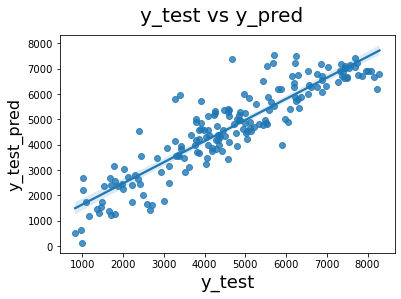

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
# plt.scatter(y_test,y_test_pred)
sns.regplot(y=y_test_pred,x=y_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # Y-label

#### Inference:
- Error term does not vary much as the value of the predictor variable changes.

##### Error Terms for test data

Text(0, 0.5, 'Counts - Predicted Counts')

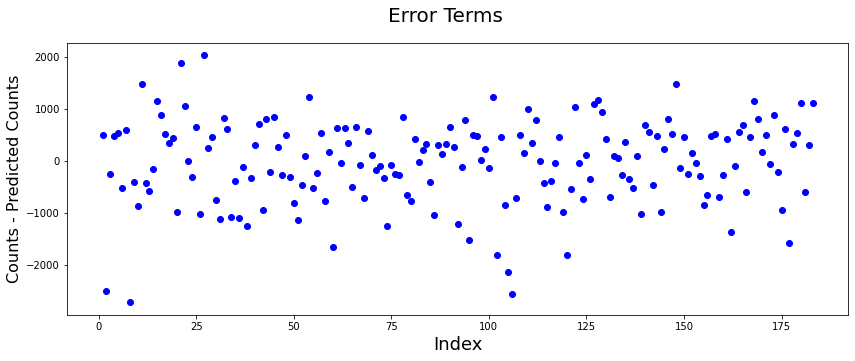

In [58]:
c = [i for i in range(1,184,1)]  # 184 is given as 25% of test data only
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Counts - Predicted Counts', fontsize=16)  

#### Inference:
- Error terms are randomly distributed and there is no pattern 

# Conclusion
#### Significant Features to predict the demand for shared bikes:
    - Year(2019)
    - Holiday
    - atemp - Feeling Temprature
    - Seasons (Spring, Winter)
    - Month (November, December)
    - Weather
        - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - Windspeed
    - Sunday

# Observations:
- Analysing the above model, the comapany should focus on the following features:
    - Company should focus on business during Holidays.
    - Company should focus on business during Month of Nov and Dec.
    - Company should focus on business during Sundays and Holidays.
    - Company should focus on business during Spring and Winters.
- When the situation comes back to Normal, Company can release some offers during above time to attract more customer based with discounts or attractive offers.
- There would always be less consumption during bad and severe weather, accordingly company can shift bikes to ports where wheather is normal and it can cover the loss of business due to less booking.